# 01.03 rootfinding : error

##### code, support for section text

In [ ]:
if False: # settings for sensei
  from google.colab import auth
  from googleapiclient.discovery import build

  auth.authenticate_user()
  about = build('drive','v3').about().get(fields='user').execute()
  if about['user']['displayName'] == "Sun K.":

    # output to pdf setting
    from google.colab import output
    output.no_vertical_scroll()
    #output.no_horizontal_scroll() # sigh, doesnt exist

In [ ]:
if True: # settings for the people
  from itertools import count
  import math as m
  import matplotlib.animation
  import matplotlib.pyplot as plt
  import numpy as np
  import numpy.polynomial as npp
  import scipy as sp
  import sympy as sy
  import textwrap
  from tabulate import tabulate

###### code, bisection

In [ ]:
# bisection, expanded for lecture

def bisect_expanded(f,ab,tol,all=False,workspace=False):

  if all:
    iterations = 0
  if workspace:
    ws = []
    i = 0

  a = ab[0]
  b = ab[1]
  while (b-a)/2 > tol:
    c = (a+b)/2
    fc = f(c)
    fs = 1 if fc > 0 else -1 if fc < 0 else 0 # bc all one dtype

    if fc == 0:
      if workspace:
        ws.append([i,a,fa,b,fb,c,fc,fs])
      break;
    if not 'fa' in locals(): # ie, local to function
      fa = f(a)
      if workspace:
        fb = f(b)
    if workspace:
      ws.append([i,a,fa,b,fb,c,fc,fs])
      i += 1

    if fa*fc < 0:
      b = c
      if workspace:
        fb = fc
    else:
      a = c
      fa = fc

    if all:
      iterations += 1
  if all:
    if workspace:
      return c,(a,b),iterations,ws
    else:
      return c,(a,b),iterations
  else:
    if workspace:
      return c,ws
    else:
      return c


###### code, fpi

In [ ]:
# fpi, basic

def fpi(g,x,tol=1e-8,max_iter=100):
  count = 0
  gx = g(x)
  while (abs(gx-x) > tol) and (count < max_iter):
    x = gx
    gx = g(x)
    count += 1
  return x


In [ ]:
# fpi, expanded for lecture

def fpi_expanded(g,x,tol=1e-8,max_iter=100,worksheet=False):

  count = 0
  if worksheet:
    data = []

  gx = g(x)
  if worksheet:
    data.append([count,x])
  while (abs(gx-x) > tol) and (count < max_iter):
    x = gx
    gx = g(x)

    count += 1
    if worksheet:
      data.append([count,x])
  if worksheet:
    return data
  else:
    return x


###### code, examples

In [ ]:
# example 07 extends example 01

def eg_07(show="ani"):
  """
  show: "ani" animation; "zero" zeros; else "data" (in table)
  """

  # sympy hack for displaying f
  x = sy.symbols("x")

  # prob-def
  f = lambda x: pow(x,3) - 2*pow(x,2) + 4*x/3 - 8/27
  ab = (-0.5,1.5)
  tol = 1e-07

  # prof-def, generalized
  x = sy.symbols("x") # sympy hack to display lambda
  #s_title = "bisection: $x^3 + x - 1$, $x \in[0,1]$\n"
  s_title = f"bisection: ${sy.latex(f(x))}$, $x\in[{ab}]$\n"

  # prof-def, runtime
  # calc
  root,ws = bisect_expanded(f,ab,tol,workspace=True)

  # cfg, runtime
  iterations = 3

  if show == "ani": # output, ani # True requires "ani" in a separate code cell

    # data, true, scatter
    h = 0.1
    xs = np.arange(ab[0],ab[1]+h,h)
    ys = f(xs)

    # data, true, plot
    h_plot = h/10
    xs_plot = np.arange(ab[0]-h,ab[1]+h+h_plot,h_plot)
    ys_plot = f(xs_plot)

    # plot, cfg
    plt.close("all")
    # plot, animation
    plt.rcParams["animation.html"] = "jshtml"
    plt.rcParams['figure.dpi'] = 100
    plt.ioff()
    fig,ax = plt.subplots()
    iani = count() # used in animate()

    # plot, actual
    dsize = 200 # lol if you try to show 5+ iterations BC WHY WOULD YOU EVER?!
    size = dsize*iterations + dsize/2
    ax.plot(xs_plot,ys_plot,zorder=1)
    ax.scatter(xs,ys,zorder=3)
    #ax.scatter(root,f(root),marker="*",s=size,zorder=2)

    # plot, axes range
    ax.set_xlim(ab[0]-h,ab[1]+h)
    fa = f(ab[0]); fb = f(ab[1])
    if fa < fb:
      ymin = m.floor(fa); ymax = m.ceil(fb)
    else:
      ymin = m.floor(fb); ymax = m.ceil(fa)
    ax.set_ylim(ymin-h,ymax+h)
    ax2 = ax.twinx()

    # plot, id
    ax.set_title(s_title)
    ax.grid()

    # plot, iterations
    zorder = 10
    ws = np.array(ws) # for referential
    def animate(t):
      ax2.cla()
      offsets = {}
      k = next(iani)
      if k == 2:
        ax.scatter(root,f(root),color="C01",marker="*",s=size,zorder=2)
      if k > 2:
        step = 2
        imax = k-2
        for iset in range(0,imax,step):
          i = iset // step
          color = f"C{i+1:02d}" # C01,C02,C03,...

          jmax = min(imax-iset,2)
          for j in range(jmax):
            if j == 0:
              xs_j = [ws[i,1],ws[i,3]]
              ys_j = [ws[i,2],ws[i,4]]
              acbs = ["a","b"]
            else:
              xs_j = [ws[i,5]]
              ys_j = [ws[i,6]]
              acbs = ["c"]
            ax2.scatter(xs_j,ys_j,color=color,marker=".",s=size-i*dsize,zorder=zorder+i)
            for acb,x,y in zip(acbs,xs_j,ys_j):
              label = "$" + acb+ "_{" + str(i) + "}$"
              if x in offsets:
                offsets[x] += 1
              else:
                offsets[x] = 1
              ax2.text(x-h_plot*2,y-h/2-h*offsets[x],label,color=color,fontweight="bold",zorder=zorder*2)

      ax2.set_xlim(ab[0]-h,ab[1]+h)
      ax2.set_ylim(ymin-h,ymax+h)

    ani = matplotlib.animation.FuncAnimation(fig,animate,frames=8,interval=8)
    return ani

  elif show == "zero":
    # plot, cfg
    plt.close("all")

    # root, from previous cell
    plt.scatter(root,f(root),color="C01",marker="*")

    imin = 0; izero = 0;
    abz = (0.666656,0.666676)
    n = 100
    xs_z = np.linspace(abz[0],abz[1],n+1)
    h = (abz[1]-abz[0])/n

    ys_z = f(xs_z)
    cs_z = np.zeros((101,1),dtype=int)
    for i,y in enumerate(ys_z):
      sign = 1 if y > 0 else -1 if y < 0 else 0
      cs_z[i] = sign
      if sign == 0:
        izero += 1
        if imin == 0:
          imin = i
        imax = i
    plt.scatter(xs_z,ys_z,c=cs_z)
    plt.annotate(f"$r_1={xs_z[imin]}$",(xs_z[imin],ys_z[imin]+0.1e-15))
    s_zero = "{" + str(izero) + "}"
    plt.annotate(f"$r_{s_zero}={xs_z[imax]}$",(xs_z[imax],ys_z[imax]-0.1e-15))

    plt.title(f"{izero} zeros out of {n+1} equally spaced points\n\nfeel confident?\n")
    plt.grid()
    plt.show()

  else: # output, table
    if False: # use iterations
      print(tabulate(ws[0:iterations][:],headers=["i","a","f(a)","b","f(b)","c","f(c)","±"],intfmt="03d",floatfmt=".8f",tablefmt="github"))
    else:
      print(tabulate(ws,headers=["i","a","f(a)","b","f(b)","c","f(c)","±"],intfmt="03d",floatfmt=".8f",tablefmt="github"))


## 1 forward and backward

##### example 07

find root of $f(x) = x^3 - 2x^2 + \tfrac{4}{3}x - \tfrac{8}{27}$ to within six significant digits using bisection.

$f(0)\cdot f(1) = (-\tfrac{8}{27})\cdot(\tfrac{1}{27}) < 0$ so IVT guarantees a solution in $[0,1]$ and example 02 calculates 20 steps as sufficient for six significant digits. it is also easy to eyeball that

$$f(\tfrac{2}{3}) = \tfrac{8}{27} - 2\left( \tfrac{4}{9} \right) + \left( \tfrac{4}{3} \right)\left( \tfrac{2}{3} \right) - \left( \tfrac{8}{27} \right) = 0. \enspace\checkmark$$

<b><i><font color=red>however...</font></i></b>

In [ ]:
ani = eg_07() # extends example 01
ani

In [ ]:
eg_07(show="data")

|   i |           a |        f(a) |          b |       f(b) |          c |        f(c) |   ± |
|-----|-------------|-------------|------------|------------|------------|-------------|-----|
| 000 | -0.50000000 | -1.58796296 | 1.50000000 | 0.57870370 | 0.50000000 | -0.00462963 | -01 |
| 001 |  0.50000000 | -0.00462963 | 1.50000000 | 0.57870370 | 1.00000000 |  0.03703704 | 001 |
| 002 |  0.50000000 | -0.00462963 | 1.00000000 | 0.03703704 | 0.75000000 |  0.00057870 | 001 |
| 003 |  0.50000000 | -0.00462963 | 0.75000000 | 0.00057870 | 0.62500000 | -0.00007234 | -01 |
| 004 |  0.62500000 | -0.00007234 | 0.75000000 | 0.00057870 | 0.68750000 |  0.00000904 | 001 |
| 005 |  0.62500000 | -0.00007234 | 0.68750000 | 0.00000904 | 0.65625000 | -0.00000113 | -01 |
| 006 |  0.65625000 | -0.00000113 | 0.68750000 | 0.00000904 | 0.67187500 |  0.00000014 | 001 |
| 007 |  0.65625000 | -0.00000113 | 0.67187500 | 0.00000014 | 0.66406250 | -0.00000002 | -01 |
| 008 |  0.66406250 | -0.00000002 | 0.67187500 | 0

so the algorithm stops at 16 iterations and at less than six significant digits bc it thinks that last $c_{16} = 0.66666412$ as $f(r) = 0$.

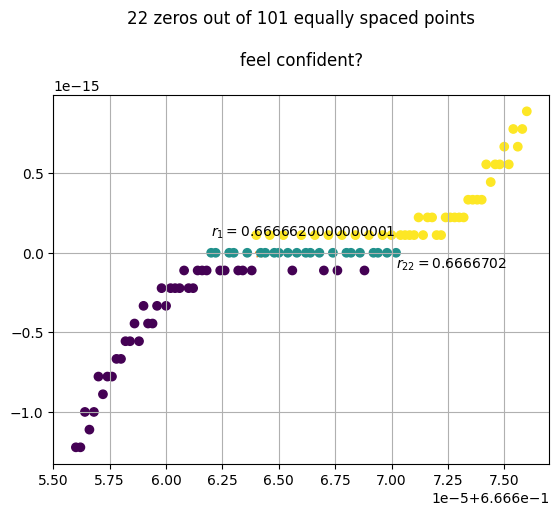

In [ ]:
eg_07(show="zero") # multiple roots in the wrong way # root from eg_07()

the only information any method has is the function (computed in double precision). if computer arithmetic calculates the function as zero for a nonroot, the method cannot recover. ie, an approximate solution might be close to its actual solution yet far from its expected input. 👀

##### definition 08

assume function $f$ has root $r$ such that $f(r) = 0$. assume $x_a$ is an approximation to $r$. for root-finding, <b>backward error</b> is $|f(x_a)|$ and <b>forward error</b> is $|r-x_a|$.

ie, wrt solution for a problem.
<br/>

|problem (type)|input|method|output|
|-|-|-|-|
|evaluation|x|f(x)|y=f(x)=?|
|root-finding|f(x)=0|solver|r=x=?|

##### example 07, continued

its forward error is approximately $10^{-5}$; however, its backward error is near $\epsilon_{\text{mach}} \approx 2.2\times 10^{-16}$. ie, $\epsilon_{\text{mach}}$ limits backward error which limits forward error.

also,

$$f(x) = x^3 - 2x^2 + \tfrac{4}{3}x - \tfrac{8}{27} = \left( x - \tfrac{2}{3} \right)^3.$$

##### definition 09

$r$ is a root of differentiable function $f$. ie, $f(r) = 0$. then if $0 = f'(r) = f''(r) = \dots = f^{(m-1)}(r)$ but $f^{(m)}(r) \ne 0$ then $f$ has <b>root</b> of <b>multiplicity</b> $m$ at $r$. if $m > 1$, then $r$ is a <b>multiple root</b>; if $m = 1$, then $r$ is a <b>simple root</b>.

eg, $f(x) = x^2$ has $r=0$ and $m=2$ bc $f(0) = 0$, $f'(0) = 2(0) = 0$ and $f''(0) = 2 \ne 0$. likewise, $f(x) = x^3$ has triple root at $r=0$ and $f(x) = x^m$ has multiplicity $m$ root $r=0$.

##### example 07, continued

example 07 has triple root at $r=\tfrac{2}{3}$. bc example 07 is flat near its triple root, there exists disparity between its backward and forward errors for nearby approximate solutions.

##### example 08

function $f(x) = sin\,x - x$ has triple root at $r=0$. calculate forward and backward error at approximate root $x_c = 0.001$.

\begin{align}
  f(0) &= sin\,0 - 0 = 0 \\
  f'(0) &= cos\,0 -1 = 0 \\
  f''(0) &= -sin\,0 - 0 = 0 \\
  f'''(0) &= -cos\,0 = -1 \ne 0. \\
  \\
  &\Rightarrow\quad r = 0 \text{ is a triple root.} \enspace\checkmark
\end{align}

- forward error: $|r-x_c| = |0 - 0.001| = 0.001$;
- backward error: $|f(x_c)| = |sin(0.001) - 0.001| \approx 1.6667\times 10^{-10}$.

##### usw

forward and backward error are important to stopping criteria for equation solvers. which one is more appropriate? it depends. if using bisection to solve for a root, both errors are observable; if using FPI, only backward error is available bc the true root is typically unknown. also functions are flat near a multiple root.

## 2 wilkinson polynomial

\begin{align}
  W(x) &= (x-1)(x-2)\dots(x-20) \\
  \\
  &= x^{20} - 210x^{19} + 20615x^{18} - 1256850x^{17} + 53327946x^{16} - 1672280820x^{15} \\
  &\quad + 40171771630x^{14} - 756111184500x^{13} + 11310276995381x^{12} \\
  &\quad - 135585182899530x^{11} + 1307535010540395x^{10} - 10142299865511450x^9 \\
  &\quad + 63030812099294896x^8 - 311333643161390640x^7 \\
  &\quad + 1206647803780373360x^6 - 3599979517947607200x^5 \\
  &\quad + 8037811822645051776x^4 - 12870931245150988800x^3 \\
  &\quad + 13803759753640704000x^2 - 8752948036761600000x \\
  &\quad + 2432902008176640000.
\end{align}

wilkinson, expanded.

In [ ]:
# tried some stuffs

if __name__ == "__main__":

  w = lambda x: pow(x,20) - 210*pow(x,19) + 20615*pow(x,18) \
      - 1256850*pow(x,17) + 53327946*pow(x,16) - 1672280820*pow(x,15) \
      + 40171771630*pow(x,14) - 756111184500*pow(x,13) + 11310276995381*pow(x,12) \
      - 135585182899530*pow(x,11) + 1307535010540395*pow(x,10) - 10142299865511450*pow(x,9) \
      + 63030812099294896*pow(x,8) - 311333643161390640*pow(x,7) \
      + 1206647803780373360*pow(x,6) - 3599979517947607200*pow(x,5) \
      + 8037811822645051776*pow(x,4) - 12870931245150988800*pow(x,3) \
      + 13803759753640704000*pow(x,2) - 8752948036761600000*x \
      + 2432902008176640000

  print(f"scipy.optimize.root: whatever\n\n{sp.optimize.root(w,16)}\n")
  print(f"scipy.optimize.root_scalar: bisection\n\n{sp.optimize.root_scalar(w,bracket=(15.9,16.1),method='bisect')}\n")
  print(f"scipy.optimize.root_scalar: newton ~ FPI\n\n{sp.optimize.root_scalar(w,x0=16,method='newton')}\n")

  gw = lambda x: (pow(x,20) - 210*pow(x,19) + 20615*pow(x,18) \
      - 1256850*pow(x,17) + 53327946*pow(x,16) - 1672280820*pow(x,15) \
      + 40171771630*pow(x,14) - 756111184500*pow(x,13) + 11310276995381*pow(x,12) \
      - 135585182899530*pow(x,11) + 1307535010540395*pow(x,10) - 10142299865511450*pow(x,9) \
      + 63030812099294896*pow(x,8) - 311333643161390640*pow(x,7) \
      + 1206647803780373360*pow(x,6) - 3599979517947607200*pow(x,5) \
      + 8037811822645051776*pow(x,4) - 12870931245150988800*pow(x,3) \
      + 13803759753640704000*pow(x,2) + 2432902008176640000) / 8752948036761600000

  for x0 in np.arange(15.1,16.,0.1): # lolwut
    root = fpi(gw,x0)
    print(f"FPI({x0}): {root}") # lol


scipy.optimize.root: whatever

 message: The solution converged.
 success: True
  status: 1
     fun: [-6.029e+09]
       x: [ 1.600e+01]
  method: hybr
    nfev: 3
    fjac: [[-1.000e+00]]
       r: [ 2.474e+17]
     qtf: [ 6.029e+09]

scipy.optimize.root_scalar: bisection

      converged: True
           flag: converged
 function_calls: 39
     iterations: 37
           root: 16.003582954652668
         method: bisect

scipy.optimize.root_scalar: newton ~ FPI

      converged: False
           flag: convergence error
 function_calls: 100
     iterations: 50
           root: 16.000000171386752
         method: newton

FPI(15.1): 15.099987116761817
FPI(15.2): 15.199972574526747
FPI(15.299999999999999): 15.29995870626266
FPI(15.399999999999999): 15.399944957194926
FPI(15.499999999999998): 15.499936025285603
FPI(15.599999999999998): 15.599931663603696
FPI(15.699999999999998): 15.699935685635873
FPI(15.799999999999997): 15.799947960421843
FPI(15.899999999999997): 15.89996854919591
FPI(15

wilkinson, bonus.

In [ ]:
# just bc

if __name__ == "__main__":

  p = npp.Polynomial.fromroots(range(1,21)) # [1,21) = [1,20]
  print(f"roots, reconstitute:\n\n{p.roots()}\n")
  print(f"coeffs, calculated:\n\n{p.coef}\n")
  print(f"wilkinson, expanded:\n\n{p}\n")
  print(f"w(16): {p(16)} = LOLS!!")


roots, reconstitute:

[ 1.          2.          3.          4.00000002  4.9999996   6.00000521
  6.99995561  8.00026686  8.99881078 10.00409792 10.98921356 12.02307993
 12.96334362 14.04714444 14.95450431 16.03179803 16.98312518 18.00576725
 18.99876967 20.00011801]

coeffs, calculated:

[ 2.43290201e+18 -8.75294804e+18  1.38037598e+19 -1.28709312e+19
  8.03781182e+18 -3.59997952e+18  1.20664780e+18 -3.11333643e+17
  6.30308121e+16 -1.01422999e+16  1.30753501e+15 -1.35585183e+14
  1.13102770e+13 -7.56111184e+11  4.01717716e+10 -1.67228082e+09
  5.33279460e+07 -1.25685000e+06  2.06150000e+04 -2.10000000e+02
  1.00000000e+00]

wilkinson, expanded:

2.43290201e+18 - (8.75294804e+18)·x + (1.38037598e+19)·x² -
(1.28709312e+19)·x³ + (8.03781182e+18)·x⁴ - (3.59997952e+18)·x⁵ +
(1.2066478e+18)·x⁶ - (3.11333643e+17)·x⁷ + (6.30308121e+16)·x⁸ -
(1.01422999e+16)·x⁹ + (1.30753501e+15)·x¹⁰ - (1.35585183e+14)·x¹¹ +
(1.1310277e+13)·x¹² - (7.56111184e+11)·x¹³ + (4.01717716e+10)·x¹⁴ -
(1.67228082e+09)·x

wilkinson, factored.

well. no problems? mostly?

* wilkinson comparison [sympy-style @ cmu](https://kitchingroup.cheme.cmu.edu/blog/2014/02/21/Wilkinson-s-polynomial/)
* [sympy](https://www.sympy.org/en/index.html)

## 3 sensitivity

a problem is <b>sensitive</b> if small errors in input lead to large errors in output.

this error magnification wrt rootfinding, consider a small change in the problem -- ie, the equation for which to find the root.

assume problem is to find root $r$ to $f(x) = 0$ and small change $\epsilon\, g(x)$ made to input such that

$$f(r + \Delta r) + \epsilon\, g(r + \Delta r) = 0$$

where $\epsilon$ is small and $\Delta r$ is change in root. expand $f,g$ in degree-one taylor polynomials,

$$\require{cancel}$$
\begin{align}
  f(r) + (\Delta r)f'(r) + \epsilon\,g(r) &+ \epsilon\,(\Delta r)g'(r) + \cancelto{\,\text{meh}}{\mathcal{O}((\Delta r)^2)} = 0 \\
  \\
  (\Delta r)(f'(r) + \epsilon\,g'(r)) &\approx \cancelto{\,0}{-f(r)} - \epsilon\,g(r) \\
  \\
  \Rightarrow\quad \Delta r &\approx \frac{-\epsilon\, g(r)}{f'(r) + \epsilon\, g'(r)}, \quad\epsilon \ll f'(r) \text{ and } f'(r) \ne 0 \\
  \\
  &\approx \epsilon\, \frac{g(r)}{f'(r)}.
\end{align}

##### <b>sensitivity formula for roots</b>

assume $r$ is root of $f(x)$ and $r + \Delta r$ is a root of $f(x) + \epsilon\, g(x)$. then

$$\Delta r \approx - \frac{\epsilon\, g(r)}{f'(r)}, \quad\epsilon\, \ll f'(r).$$

##### example 09

estimate largest root of $P(x) = (x-1)(x-2)(x-3)(x-4)(x-5)(x-6) - 10^{-6}x^7$.

\begin{align}
  \Rightarrow f(x) &= (x-1)(x-2)(x-3)(x-4)(x-5)(x-6) \\
  \\
  \epsilon &= -10^{-6} \\
  \\
  g(x) &= x^7.
\end{align}
<br/>

with only $f(x)$, largest root is $r=6$. with $\epsilon\, g(x)$,

$$\Delta r \approx -\frac{\epsilon\, 6^7}{5!} = -2332.8\, \epsilon.$$

ie, input errors of relative size $\epsilon$ in $f(x)$ are magnified over $2000\times$ into output root. so largest root of $P(x) \Rightarrow r + \Delta r = 6 - 2332.8\, \epsilon = 6.0023328$.

In [ ]:
# example 09

if __name__ == "__main__":

  f = lambda x: (x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6) - 1e-6*pow(x,7)

  x0 = 6
  soln = sp.optimize.root(f,x0)
  print(soln)
  print(f"\nscipy.optimize.root({x0}): {soln.x[0]}")


 message: The solution converged.
 success: True
  status: 1
     fun: [-3.236e-14]
       x: [ 6.002e+00]
  method: hybr
    nfev: 6
    fjac: [[-1.000e+00]]
       r: [-1.210e+02]
     qtf: [ 2.255e-10]

scipy.optimize.root(6): 6.00232675474645


ie, an error in the sixth digit of the problem data caused an error in the third digit of the answer. ie, three decimal digits were lost due to that factor $2332.8$.

for a general algorithm that produces an approximation $x_c$,

$$\underline{\text{condition number }\kappa} = {\bf error\, magnification\, \underline{factor}} = \frac{\text{relative forward error}}{\text{relative backward error}}.$$

##### example 09, continued

$$\text{error magnification factor} = \left| \frac{\color{blue}{\Delta r}/\color{orange}{r}}{\color{green}{\epsilon}\, g(r)/g(r)} \right| = \left|
\color{blue}{\frac{-\epsilon\, g(r)}{f'(r)}}\cdot \frac{1}{\color{orange}{r}}\cdot \frac{1}{\color{green}{\epsilon}} \right| = \frac{|g(r)|}{|rf'(r)|} = \frac{6^7}{6\cdot 5!} = 388.8.$$

##### example 10

use the sensitivity formula for roots to investigate the effect of changes in the $x^{15}$ term of the wilkinson polynomial on the root $r=16$ find error magnification factor for this problem.

define perturbed function $W_{\epsilon}(x) = W(x) + \epsilon\, g(x)$, where $g(x) = -1672280820\, x^{15}$. $W'(16) = 15!4!$ and

\begin{align}
  \Delta r &\approx \frac{\epsilon\cdot 1672280820\cdot16^{15} }{15!4!} \approx 6.1432\times 10^{13}\, \epsilon \approx 6.1432\times 10^{13}\, \epsilon_{\text{mach}} \\
  \\
  &\approx (6.1432\times 10^{13})(\pm 2.22\times 10^{-16}) \approx \pm 0.0136 \\
  \\
  \Rightarrow\quad r + \Delta r &\approx 16.0136.
\end{align}

ie, a relative error of order $\epsilon_{\text{mach}}$ must be assumed for every stored number and a relative change in the $x^{15}$ term of $\epsilon_{\text{mach}}$ will move root $r$.

$$\text{error magnification:}\quad \frac{g(r)|}{|rf'(r)|} = \frac{16^{15}\cdot 1672280802}{15!4!16} \approx 3.8\times 10^{12}.$$

ie, an error magnification factor of $10^{12}$ results in loss of $12$ of $16$ bits of operating percision from input to output. ie, instead of $r=16$, it is $r + \Delta r = \underline{16.01}4...$.

##### usw

the <b>condition number</b> <i>of a problem</i> is defined to be the maximum error magnification over all input changes. a problem with high condition number is <b>ill-conditioned</b> and a problem with a condition number near one is <b>well-conditioned</b>.

## resources

meh. youre good.